<a href="https://colab.research.google.com/github/4juneko/Aiffel_work/blob/master/23_chatbot_korean_transformer_06222023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric
|ÌèâÍ∞ÄÎ¨∏Ìï≠|	ÏÉÅÏÑ∏Í∏∞Ï§Ä|ÎÇ¥ ÌèâÍ∞Ä|
|--|--|--|
|1. ÌïúÍµ≠Ïñ¥ Ï†ÑÏ≤òÎ¶¨Î•º ÌÜµÌï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨Ï∂ïÌïòÏòÄÎã§.|	Í≥µÎ∞±Í≥º ÌäπÏàòÎ¨∏Ïûê Ï≤òÎ¶¨, ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï, Î≥ëÎ†¨Îç∞Ïù¥ÌÑ∞ Íµ¨Ï∂ïÏùò Í≥ºÏ†ïÏù¥ Ï†ÅÏ†àÌûà ÏßÑÌñâÎêòÏóàÎã§.|o|
|2. Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌïòÏó¨ ÌïúÍµ≠Ïñ¥ Ï±óÎ¥á Î™®Îç∏ ÌïôÏäµÏùÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÌïòÏòÄÎã§.	|Íµ¨ÌòÑÌïú Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïù¥ ÌïúÍµ≠Ïñ¥ Î≥ëÎ†¨ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ Ïãú ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÏòÄÎã§.|o|
|3. ÌïúÍµ≠Ïñ¥ ÏûÖÎ†•Î¨∏Ïû•Ïóê ÎåÄÌï¥ ÌïúÍµ≠Ïñ¥Î°ú ÎãµÎ≥ÄÌïòÎäî Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïòÏòÄÎã§.|	ÌïúÍµ≠Ïñ¥ ÏûÖÎ†•Î¨∏Ïû•Ïóê Îß•ÎùΩÏóê ÎßûÎäî ÌïúÍµ≠Ïñ¥Î°ú ÎãµÎ≥ÄÏùÑ Î¶¨ÌÑ¥ÌïòÏòÄÎã§.|o|

- Transformer
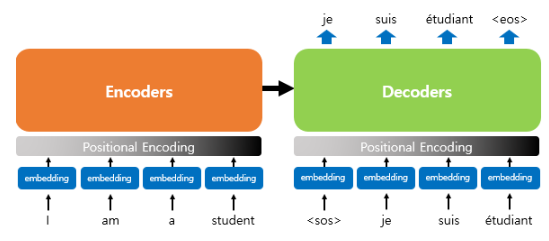

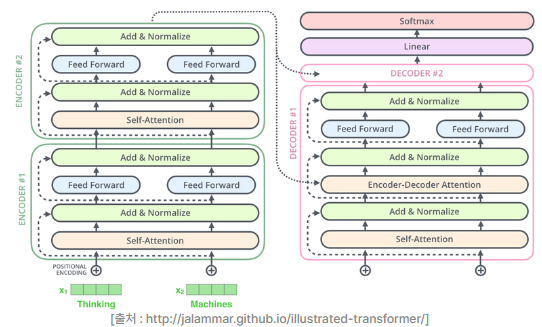

# Import Library

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print("Ïäù=3")

Ïäù=3


# 1 Get Data

In [ ]:
mkdir -p ~/aiffel/transformer_chatbot/data/

In [ ]:
!ln -s ~/data/* ~/aiffel/transformer_chatbot/data/
# https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv

ln: failed to create symbolic link '/aiffel/aiffel/transformer_chatbot/data/ChatbotData .csv': File exists


# 2 Preprocess Data

In [ ]:
file_path = os.getenv('HOME')+'/aiffel/transformer_chatbot/data/ChatbotData .csv'

data = pd.read_csv(file_path)
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


Q                       A  label
6800                  Ïã∏Íµ¨Î†§ Ïù∏ÏÉù  ÎàÑÍµ¨ÎèÑ ÎãπÏã†Ïùò Ïù∏ÏÉùÏùÑ ÌèâÍ∞ÄÌï† Ïàò ÏóÜÏñ¥Ïöî.      1
5061             Ìï∏ÎìúÌè∞ ÎÑàÎ¨¥ ÎßéÏù¥ Ìï¥         Í∑∏ÎûòÏÑú Ï†ÄÎ•º ÎßåÎÇ† Ïàò ÏûàÏ£†.      0
4661          ÏπúÍµ¨Îûë ÏûàÏúºÎ©¥ ÎÇ¥Í∞Ä ÏûëÏïÑÏ†∏       ÎãπÏã†ÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ ÌÅ∞ ÏÇ¨ÎûåÏù¥ÏóêÏöî.      0
976           ÎÑàÎ¨¥ Ï∂îÏõåÏÑú ÏãúÎ≤†Î¶¨ÏïÑ Í∞ôÏïÑ          Ïñ¥ÏÑú Îî∞ÎìØÌïú Í≥≥ÏúºÎ°ú Í∞ÄÏÑ∏Ïöî      0
8952             Í≤∞ÌòºÏãù ÎÇ†Ïßú Ïû°ÏúºÎ†§Í≥†                  Ï∂ïÌïòÎìúÎ†§Ïöî.      2
2158             Î∂ÄÏûê Î∞±Ïàò ÌïòÍ≥† Ïã∂Ïñ¥                 Í∑∏Í≤å ÏµúÍ≥†Ï£†.      0
8048  Ï†ïÎßê ÏïÑÏßÅ ÎÑàÎ¨¥ ÏÇ¨ÎûëÌï©ÎãàÎã§ Ïû°Í≥† Ïã∂ÏäµÎãàÎã§        Îã§Ïãú Ïû°ÎäîÎã§Î©¥ ÌõÑÌöåÌï† Í±∞ÏòàÏöî.      1
7273               ÏöïÏùÑ ÌçºÎ∂ìÍ≥† ÏôìÏñ¥          ÎßàÏùåÏù¥ ÌõÑÎ†®ÌïòÍ∏∏ Î∞îÎûçÎãàÎã§.      1
8304                   Ï∞∏ÏïÑÏïºÍ≤†ÏßÄ        Í∞ÄÎÅîÏùÄ ÎÇ¥ÌÇ§Îäî ÎåÄÎ°ú Ìï¥Î≥¥ÏÑ∏Ïöî.      1
9922              ÏÇ¨ÎûëÏù¥ Î≠òÍπå Í∂ÅÍ∏àÌï¥           Ï†ÄÎèÑ ÏÉÅÎãπÌûà Í∂ÅÍ∏àÌïòÎÑ§Ïöî.      2

In [ ]:
data['label'].unique()

array([0, 1, 2])

In [ ]:
data.groupby(['label']).count()

Q     A
label            
0      5290  5290
1      3570  3570
2      2963  2963

In [ ]:
# ÏÇ¨Ïö©Ìï† ÏÉòÌîåÏùò ÏµúÎåÄ Í∞úÏàò
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


In [ ]:
from konlpy.tag import Mecab
from collections import Counter

tokenizer = Mecab()
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

def preprocess_sentence(sentence):
#   sentence = sentence.lower().strip()

  # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
  # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
  sentence = re.sub(r"[^a-zA-Z|„Ñ±-„Öé|„Öè-„Ö£|Í∞Ä-Ìû£|?.!,0-9]+", " ", sentence)
  sentence = sentence.strip()
  return sentence
print("Ïäù=3")

Ïäù=3


In [ ]:
# ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò
def load_conversations(data):
    inputs, outputs =[],[]

    q_sentences = data['Q']
    a_sentences = data['A']

    for i,j in zip(q_sentences, a_sentences):
        inputs.append(preprocess_sentence(i))
        outputs.append(preprocess_sentence(j))

    return inputs, outputs

print("Ïäù=3")

Ïäù=3


In [ ]:
# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ ÏßàÎ¨∏ÏùÑ questions, ÎãµÎ≥ÄÏùÑ answersÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
questions, answers = load_conversations(data)
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(questions))
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(answers))
print('{} : {}'.format(questions[1], answers[1]))
print('{} : {}'.format(questions[21], answers[21]))

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 11823
Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 11823
1ÏßÄÎßù ÌïôÍµê Îñ®Ïñ¥Ï°åÏñ¥ : ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§ .
Í∞ÄÏä§ÎπÑ Ïû•ÎÇú ÏïÑÎãò : Îã§Ïùå Îã¨ÏóêÎäî Îçî Ï†àÏïΩÌï¥Î¥êÏöî .


## Preprocess pararrel data
1. TensorFlow Datasets SubwordTextEncoder Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÏÇ¨Ïö©ÌïúÎã§.  
    Îã®Ïñ¥Î≥¥Îã§ Îçî ÏûëÏùÄ Îã®ÏúÑÏù∏ SubwordÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌïòÍ≥†,  
    Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî© ÌïúÎã§.
2. Í∞Å Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Í∞Å Î¨∏Ïû•Ïùò ÏãúÏûëÍ≥º ÎÅùÏùÑ ÎÇòÌÉÄÎÇ¥Îäî START_TOKEN Î∞è END_TOKENÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
3. ÏµúÎåÄ Í∏∏Ïù¥ MAX_LENGTH Ïù∏ 40ÏùÑ ÎÑòÎäî Î¨∏Ïû•Îì§ÏùÄ ÌïÑÌÑ∞ÎßÅÌïúÎã§.
4. MAX_LENGTHÎ≥¥Îã§ Í∏∏Ïù¥Í∞Ä ÏßßÏùÄ Î¨∏Ïû•Îì§ÏùÄ 40Ïóê ÎßûÎèÑÎ°ù Ìå®Îî© ÌïúÎã§.

### make vocabulary

In [ ]:
import tensorflow_datasets as tfds
print("ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê")

# ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Vocabulary ÏÉùÏÑ±
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("Ïäù=3 ")

ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê
Ïäù=3 


In [ ]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("Ïäù=3")

Ïäù=3


In [ ]:
print('START_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size])
print('END_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size + 1])

START_TOKENÏùò Î≤àÌò∏ : [8170]
END_TOKENÏùò Î≤àÌò∏ : [8171]


In [ ]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ +2Î•º ÌïòÏó¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Î•º ÏÇ∞Ï†ïÌï©ÎãàÎã§.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8172


### Encoding(to integer) & Padding

In [ ]:
# ÏûÑÏùòÏùò 22Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Ï†ïÏàò Ïù∏ÏΩîÎî© ÏûëÏóÖÏùÑ ÏàòÌñâ.
# Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Î≥ÄÌôò
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 1Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[1])))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 1Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[1])))

print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[21])))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[21])))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 1Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [7963, 47, 917, 7946, 997, 1715]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 1Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [1828, 5499, 1]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [5762, 610, 2490, 4163]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [2356, 7510, 7, 6273, 97, 1]


In [ ]:
# ÏÉòÌîåÏùò ÏµúÎåÄ ÌóàÏö© Í∏∏Ïù¥ ÎòêÎäî Ìå®Îî© ÌõÑÏùò ÏµúÏ¢Ö Í∏∏Ïù¥
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [ ]:
# Ï†ïÏàò Ïù∏ÏΩîÎî©, ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï¥àÍ≥ºÌïòÎäî ÏÉòÌîå Ï†úÍ±∞, Ìå®Îî©
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
    # Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞Ä
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # ÏµúÎåÄ Í∏∏Ïù¥ 40 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ÏóêÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌóàÏö©
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    # ÏµúÎåÄ Í∏∏Ïù¥ 40ÏúºÎ°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìå®Îî©
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs
print("Ïäù=3")

Ïäù=3


In [ ]:
questions_token, answers_token = tokenize_and_filter(questions, answers)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :',(VOCAB_SIZE))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: {}'.format(len(questions)))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: {}'.format(len(answers)))
print('{} : {}'.format(questions_token[1], answers_token[1]))
print('{} : {}'.format(questions_token[21], answers_token[21]))

Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 8172
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: 11823
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: 11823
[8170 7963   47  917 7946  997 1715 8171    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0] : [8170 1828 5499    1 8171    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8170 5762  610 2490 4163 8171    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0] : [8170 2356 7510    7 6273   97    1 8171    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


### Teacher Forcing

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# ÎîîÏΩîÎçîÎäî Ïù¥Ï†ÑÏùò targetÏùÑ Îã§ÏùåÏùò inputÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# Ïù¥Ïóê Îî∞Îùº outputsÏóêÏÑúÎäî START_TOKENÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions_token,
        'dec_inputs': answers_token[:, :-1]
    },
    {
        'outputs': answers_token[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("Ïäù=3")

Ïäù=3


# 3 Get Model

In [ ]:
# padding masking
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32) # tf.cast : d.typeÏùÑ Î∞îÍæ∏Îäî Ìï®Ïàò
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]
print("Ïäù=3")

Ïäù=3


In [ ]:
# look ahead masking
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)
print("Ïù¥Ìï¥Î™ªÌï®")

Ïù¥Ìï¥Î™ªÌï®


In [ ]:
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # Í∞ÅÎèÑ Î∞∞Ïó¥ ÏÉùÏÑ±
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # Î∞∞Ïó¥Ïùò ÏßùÏàò Ïù∏Îç±Ïä§ÏóêÎäî sin Ìï®Ïàò Ï†ÅÏö©
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Î∞∞Ïó¥Ïùò ÌôÄÏàò Ïù∏Îç±Ïä§ÏóêÎäî cosine Ìï®Ïàò Ï†ÅÏö©
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sinÍ≥º cosineÏù¥ ÍµêÏ∞®ÎêòÎèÑÎ°ù Ïû¨Î∞∞Ïó¥
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0])
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("Ïäù=3")

Ïäù=3


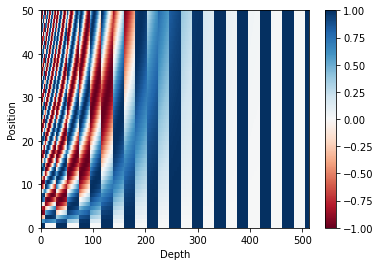

In [ ]:
# ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ : 50, ÏõåÎìú ÏûÑÎ≤†Îî© Ï∞®Ïõê : 512
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

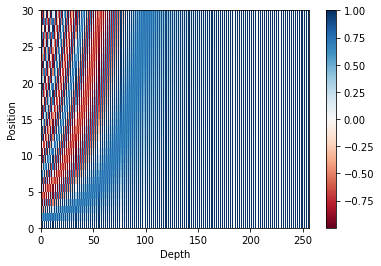

In [ ]:
# ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ : 30, ÏõåÎìú ÏûÑÎ≤†Îî© Ï∞®Ïõê : 256
sample_pos_encoding = PositionalEncoding(30, 256)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 256))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [ ]:
# Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
def scaled_dot_product_attention(query, key, value, mask):
  # Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎäî QÏôÄ KÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôî
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # Ìå®Îî©Ïóê ÎßàÏä§ÌÅ¨ Ï∂îÍ∞Ä
  if mask is not None:
    logits += (mask * -1e9)

  # softmaxÏ†ÅÏö©
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # ÏµúÏ¢Ö Ïñ¥ÌÖêÏÖòÏùÄ Í∞ÄÏ§ëÏπòÏôÄ VÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  output = tf.matmul(attention_weights, value)
  return output

print("Ïäù=3")

Ïäù=3


In [ ]:
# multi head attention

class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, VÏóê Í∞ÅÍ∞Å DenseÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # Î≥ëÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú Î®∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì≠ÎãàÎã§
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÌõÑÏóê Í∞Å Í≤∞Í≥ºÎ•º Îã§Ïãú Ïó∞Í≤∞(concatenate)Ìï©ÎãàÎã§
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # ÏµúÏ¢Ö Í≤∞Í≥ºÏóêÎèÑ DenseÎ•º Ìïú Î≤à Îçî Ï†ÅÏö©Ìï©ÎãàÎã§
    outputs = self.dense(concat_attention)

    return outputs
print("Ïäù=3")

Ïäù=3


In [ ]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))
# 0Ïù∏ Î∂ÄÎ∂ÑÏùÄ 1Î°ú ÏïÑÎãàÎ©¥ 0ÏúºÎ°ú Î∞îÎÄåÏóàÎÑ§

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [ ]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [ ]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [ ]:
# Encoder layer = self attention(multi head attention) + feed forward neural network
# Ïù∏ÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî Îëê Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º Layer NormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


In [ ]:
# Transformer Encoder

def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layersÎßåÌÅº ÏåìÏïÑÏò¨Î¶∞ Ïù∏ÏΩîÎçîÏùò Ï∏µ.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


In [ ]:
# Decoder layer
# ÎîîÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî
  # DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalization ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

Ïäù=3


In [ ]:
# Decoder
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # Ìå®Îî© ÎßàÏä§ÌÅ¨
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # DropoutÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

Ïäù=3


In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # Ïù∏ÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # ÎîîÏΩîÎçîÏóêÏÑú ÎØ∏ÎûòÏùò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÅ¨ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
  # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ìå®Îî© ÎßàÏä§ÌÅ¨ÎèÑ Ìè¨Ìï®ÎêòÏñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # Îëê Î≤àÏß∏ Ïñ¥ÌÖêÏÖò Î∏îÎ°ùÏóêÏÑú Ïù∏ÏΩîÎçîÏùò Î≤°ÌÑ∞Îì§ÏùÑ ÎßàÏä§ÌÇπ
  # ÎîîÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # Ïù∏ÏΩîÎçî
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # ÎîîÏΩîÎçî
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


## Model

In [ ]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 3 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 512 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    8918016     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

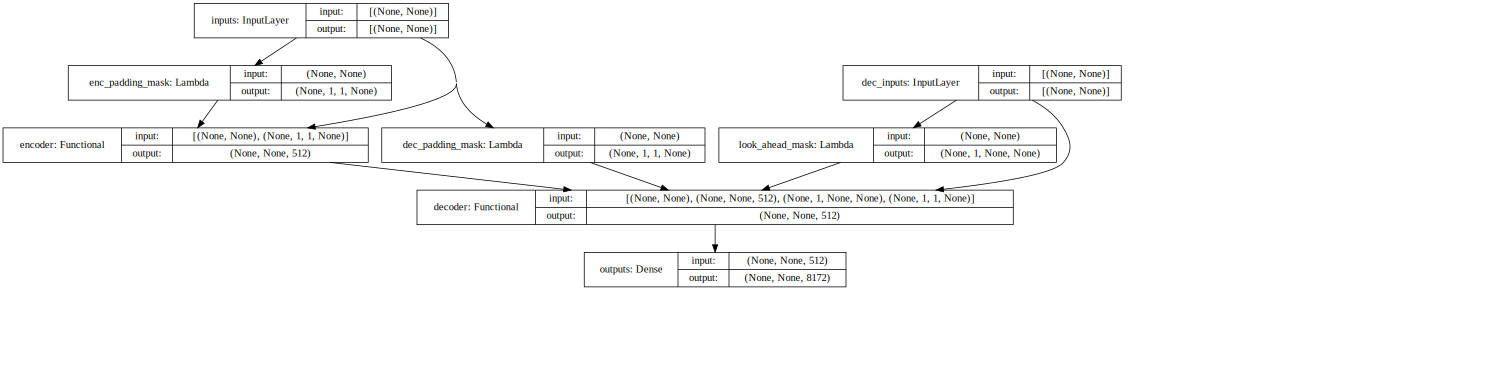

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=96).create(prog='dot', format='svg'))

## Loss function

In [ ]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("Ïäù=3")

Ïäù=3


## Learning Rate

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("Ïäù=3")

Ïäù=3


Text(0.5, 0, 'Train Step')

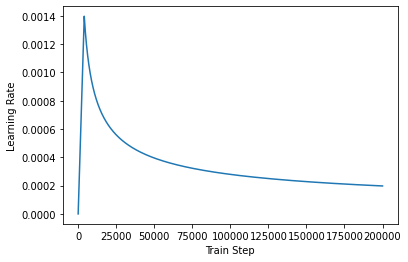

In [ ]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## Model Compile

In [ ]:
from tensorflow.keras import callbacks

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

# check_point_cb = callbacks.ModelCheckpoint('chatbot_model',
#                                            save_format='tf')
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            monitor='accuracy',
                                            restore_best_weights=True)
print("Ïäù=3")

Ïäù=3


## Train

In [ ]:
EPOCHS = 100
history1 = model.fit(dataset, epochs=EPOCHS, callbacks=[early_stopping_cb])

Epoch 1/100
185/185 [==============================] - 32s 125ms/step - loss: 1.3438 - accuracy: 0.0293
Epoch 2/100
185/185 [==============================] - 24s 127ms/step - loss: 1.0623 - accuracy: 0.0497
Epoch 3/100
185/185 [==============================] - 23s 125ms/step - loss: 0.9657 - accuracy: 0.0527
Epoch 4/100
185/185 [==============================] - 23s 124ms/step - loss: 0.9047 - accuracy: 0.0561
Epoch 5/100
185/185 [==============================] - 23s 125ms/step - loss: 0.8420 - accuracy: 0.0594
Epoch 6/100
185/185 [==============================] - 23s 125ms/step - loss: 0.7708 - accuracy: 0.0651
Epoch 7/100
185/185 [==============================] - 23s 125ms/step - loss: 0.6916 - accuracy: 0.0739
Epoch 8/100
185/185 [==============================] - 23s 125ms/step - loss: 0.6054 - accuracy: 0.0835
Epoch 9/100
185/185 [==============================] - 23s 125ms/step - loss: 0.5158 - accuracy: 0.0944
Epoch 10/100
185/185 [==============================] - 23s 125m

In [ ]:
history_dict1 = history1.history
print(history_dict1.keys()) # epochÏóê Îî∞Î•∏ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥º Ïàò ÏûàÎäî Ìï≠Î™©Îì§

dict_keys(['loss', 'accuracy'])


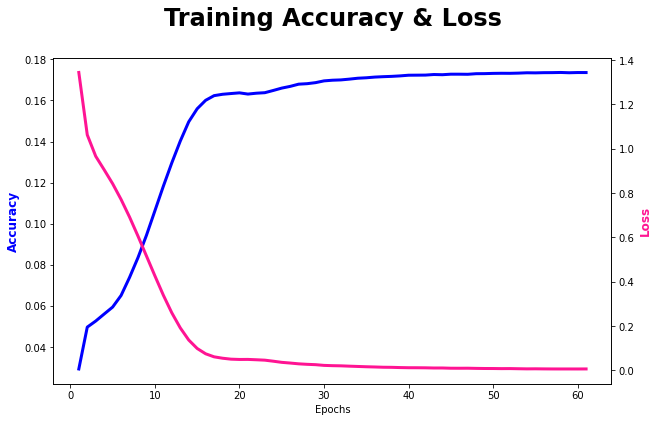

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict1['accuracy']
loss = history_dict1['loss']

epochs = range(1, len(acc) + 1)

fig, ax1= plt.subplots(figsize=(10, 6), facecolor="w")

ax1.plot(epochs, acc, lw=3, color='blue')

ax2 = ax1.twinx()

ax2.plot(epochs, loss, lw=3, color='deeppink')

# ax1.legend(['Accuracy'], loc='best', prop=dict(weight='bold'))
# ax2.legend(['Loss'], loc=(0.85, 0.93), prop=dict(weight='bold'))
ax1.set_title('Training Accuracy & Loss', fontsize=24, fontweight="bold", pad=32)

ax1.set_ylabel("Accuracy", fontsize=12, fontweight="bold", color='blue')
ax2.set_ylabel("Loss", fontsize=12, fontweight="bold", color='deeppink')
ax1.set_xlabel("Epochs")

plt.show()

In [ ]:
from keras.models import load_model
model.save_weights('chatbot_model')
# model.save("chatbot_model.h5")

In [ ]:
load_status = model.load_weights('chatbot_model')

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
load_status.assert_consumed()

# 4 Test Chat-Bot

In [ ]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
  # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
  # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
  for i in range(MAX_LENGTH):
    # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
    # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("Ïäù=3")

Ïäù=3


In [ ]:
def sentence_generation(sentence):
  # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
  prediction = decoder_inference(sentence)

  # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('ÏûÖÎ†• : {}'.format(sentence))
  print('Ï∂úÎ†• : {}'.format(predicted_sentence))

  return predicted_sentence
print("Ïäù=3")

Ïäù=3


In [ ]:
sentence_generation('Ï°∏Î¶¨Îã§.')

ÏûÖÎ†• : Ï°∏Î¶¨Îã§.
Ï∂úÎ†• : Ïû†ÏùÑ Íπ®Ïöî ! Í∏∞Ïö¥ ÎÇ¥Ïöî ! !


'Ïû†ÏùÑ Íπ®Ïöî ! Í∏∞Ïö¥ ÎÇ¥Ïöî ! !'

In [ ]:
sentence_generation("ÏßëÏù¥ Íπ®ÎÅóÌïòÎÑ§Ïöî")

ÏûÖÎ†• : ÏßëÏù¥ Íπ®ÎÅóÌïòÎÑ§Ïöî
Ï∂úÎ†• : Î¨¥Ïä® Ïù¥Ïú†ÏùºÏù¥ ÏûàÏóàÎÇòÎ¥êÏöî .


'Î¨¥Ïä® Ïù¥Ïú†ÏùºÏù¥ ÏûàÏóàÎÇòÎ¥êÏöî .'

In [ ]:
sentence_generation('ÏïÑÏπ®Ïóê ÏùºÏ∞ç ÏùºÏñ¥ÎÇòÎäî Î∞©Î≤ïÏù¥ ÏûàÎÇòÏöî?')

ÏûÖÎ†• : ÏïÑÏπ®Ïóê ÏùºÏ∞ç ÏùºÏñ¥ÎÇòÎäî Î∞©Î≤ïÏù¥ ÏûàÎÇòÏöî?
Ï∂úÎ†• : Ï°∞Í∏à Îçî ÏùºÏ∞ç Ïû†ÏùÑ ÏûêÎ≥¥ÏÑ∏Ïöî .


'Ï°∞Í∏à Îçî ÏùºÏ∞ç Ïû†ÏùÑ ÏûêÎ≥¥ÏÑ∏Ïöî .'

In [ ]:
sentence_generation("Í∞ÄÎÅî Î¨¥Î†•Ìï¥Ïßà ÎïåÍ∞Ä ÏûàÏñ¥Ïöî")

ÏûÖÎ†• : Í∞ÄÎÅî Î¨¥Î†•Ìï¥Ïßà ÎïåÍ∞Ä ÏûàÏñ¥Ïöî
Ï∂úÎ†• : ÏßÄÍ∏àÏ≤òÎüº ÌòÑÏã§ÏùÑ Ïù∏Ï†ïÌïòÏÑ∏Ïöî .


'ÏßÄÍ∏àÏ≤òÎüº ÌòÑÏã§ÏùÑ Ïù∏Ï†ïÌïòÏÑ∏Ïöî .'

# Review
- ÌïúÍ∏ÄÏù¥ÎØÄÎ°ú Ï†ÑÏ≤òÎ¶¨ÏãúÏóê ÌïúÍ∏ÄÏóê ÎåÄÌïú Í≤ÉÏùÑ Ï∂îÍ∞ÄÌïòÏòÄÏùå.
- accuracyÏôÄ loss Í∞íÏù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥Ìïú ÎìØ Î≥¥ÏûÑ.
- ÎåÄÌôî ÎÇ¥Ïö©Ïù¥ Ïñ¥ÏÉâÌïú Í≤ÉÎèÑ ÏûàÏßÄÎßå ÎåÄÏ≤¥Î°ú Í¥úÏ∞ÆÏùÄ ÎåÄÎãµÏùÑ Ìï®.  

|ÏûÖÎ†•|Ï∂úÎ†•|
|--|--|
|Ï°∏Î¶¨Îã§|Ïû†ÏùÑ Íπ®Ïöî ! Í∏∞Ïö¥ ÎÇ¥Ïöî ! !|
|ÏßëÏù¥ Íπ®ÎÅóÌïòÎÑ§Ïöî|Î¨¥Ïä® Ïù¥Ïú†ÏùºÏù¥ ÏûàÏóàÎÇòÎ¥êÏöî .|
|ÏïÑÏπ®Ïóê ÏùºÏ∞ç ÏùºÏñ¥ÎÇòÎäî Î∞©Î≤ïÏù¥ ÏûàÎÇòÏöî?|Ï°∞Í∏à Îçî ÏùºÏ∞ç Ïû†ÏùÑ ÏûêÎ≥¥ÏÑ∏Ïöî .|
|Í∞ÄÎÅî Î¨¥Î†•Ìï¥Ïßà ÎïåÍ∞Ä ÏûàÏñ¥Ïöî|ÏßÄÍ∏àÏ≤òÎüº ÌòÑÏã§ÏùÑ Ïù∏Ï†ïÌïòÏÑ∏Ïöî .|

- Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï¥Ï£ºÎ†§Îäî ÏùòÎèÑÏùò Î¨∏Ïû•Ïù¥ ÏÉùÏÑ±Ïù¥ Îê®.